In [7]:
 ################################### TESTING TO SEE HOW HSIs ARE PRESENT IN THE MAT FILE #############################################
import os
import scipy.io as sio
import numpy as np

def is_hsi_array(arr):
    return isinstance(arr, np.ndarray) and arr.ndim == 3

def count_hsi_in_file(file_path):
    try:
        mat_contents = sio.loadmat(file_path)
        count = sum(1 for v in mat_contents.values() if is_hsi_array(v))
        return count
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return 0

def count_all_hsi_in_folder(folder_path):
    total_count = 0
    file_count = 0

    print(f" Scanning folder: {folder_path}\n")

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder_path, filename)
            hsi_count = count_hsi_in_file(file_path)
            print(f"{filename}: {hsi_count} HSI cube(s)")
            total_count += hsi_count
            file_count += 1

    print(f"\n Total HSI files scanned: {file_count}")
    print(f" Total HSI cubes found: {total_count}")

# ----------------------------
# Usage Example
# ----------------------------
if __name__ == "__main__":
    folder = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset"  # Change this
    count_all_hsi_in_folder(folder)


 Scanning folder: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset

Washington-crop-test.mat: 1 HSI cube(s)

 Total HSI files scanned: 1
 Total HSI cubes found: 1


Loaded HSI shape: (200, 200, 191)


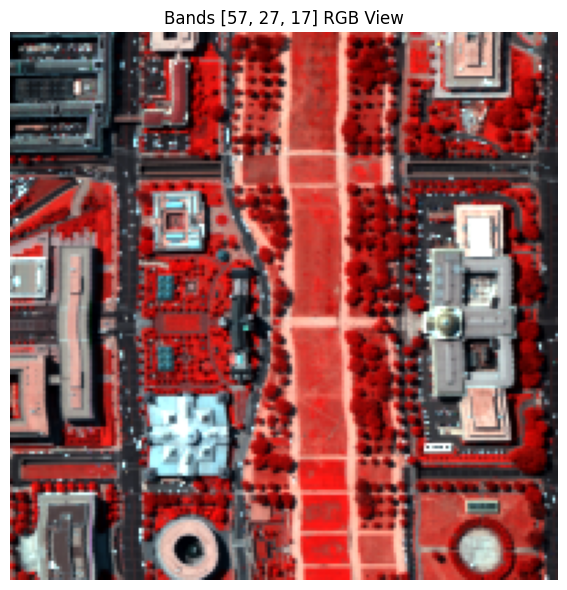

In [9]:
################################### DISPLAYING THE HSIs FOR THE TEST IMAGE - "WASHINGTON-CROP-TEST" #############################################
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path

def load_hsi_mat(file_path):
    """
    Load the HSI data from a .mat file.
    Returns a numpy array of shape (H, W, C).
    """
    data = sio.loadmat(file_path)
    for key in data:
        if isinstance(data[key], np.ndarray):
            array = data[key]
            if array.ndim == 3:
                return array.astype(np.float32)
    raise ValueError("No 3D array found in .mat file.")

def normalize_rgb(hsi, bands):
    """
    Normalize selected bands for RGB visualization.
    Args:
        hsi: np.ndarray of shape (H, W, C)
        bands: list of 3 band indices
    Returns:
        np.ndarray of shape (H, W, 3), normalized RGB image
    """
    rgb = hsi[:, :, bands]
    rgb_min = rgb.min(axis=(0, 1), keepdims=True)
    rgb_range = rgb.max(axis=(0, 1), keepdims=True) - rgb_min + 1e-8
    rgb_normalized = (rgb - rgb_min) / rgb_range
    return rgb_normalized

def visualize_hsi_rgb(rgb_image, title="HSI RGB Visualization"):
    """
    Displays the RGB image.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Main: Set your .mat file path
# -------------------------------
if __name__ == "__main__":
    # Change this to your actual file path
    mat_file = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset/wdc_crop_test.mat"

    # Load HSI
    hsi = load_hsi_mat(mat_file)
    print(f"Loaded HSI shape: {hsi.shape}")

    # Resize or crop to 200x200 if needed
    if hsi.shape[0] != 200 or hsi.shape[1] != 200:
        hsi = hsi[:200, :200, :]  # Simple crop

    # Visualize using bands [40, 27, 17] (convert to 0-based index)
    bands = [57, 27, 17]  # Assume indexing is 0-based already
    rgb_image = normalize_rgb(hsi, bands)
    visualize_hsi_rgb(rgb_image, title=f"Bands {bands} RGB View")


Loaded HSI shape: (100, 100, 191)


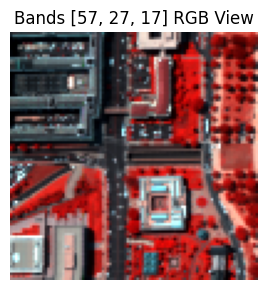

In [18]:
################################### DISPLAYING THE HSIs FOR THE TRAIN IMAGE #############################################
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path

def load_hsi_mat(file_path):
    """
    Load the HSI data from a .mat file.
    Returns a numpy array of shape (H, W, C).
    """
    data = sio.loadmat(file_path)
    for key in data:
        if isinstance(data[key], np.ndarray):
            array = data[key]
            if array.ndim == 3:
                return array.astype(np.float32)
    raise ValueError("No 3D array found in .mat file.")

def normalize_rgb(hsi, bands):
    """
    Normalize selected bands for RGB visualization.
    Args:
        hsi: np.ndarray of shape (H, W, C)
        bands: list of 3 band indices
    Returns:
        np.ndarray of shape (H, W, 3), normalized RGB image
    """
    rgb = hsi[:, :, bands]
    rgb_min = rgb.min(axis=(0, 1), keepdims=True)
    rgb_range = rgb.max(axis=(0, 1), keepdims=True) - rgb_min + 1e-8
    rgb_normalized = (rgb - rgb_min) / rgb_range
    return rgb_normalized

def visualize_hsi_rgb(rgb_image, title="HSI RGB Visualization"):
    """
    Displays the RGB image.
    """
    plt.figure(figsize=(3, 3))
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Main: Set your .mat file path
# -------------------------------
if __name__ == "__main__":
    # Change this to your actual file path
    # mat_file = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset/train_Wash2.mat"
    mat_file = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_1.mat"

    # Load HSI
    hsi = load_hsi_mat(mat_file)
    print(f"Loaded HSI shape: {hsi.shape}")

    # Resize or crop to 200x200 if needed
    if hsi.shape[0] != 200 or hsi.shape[1] != 200:
        hsi = hsi[:200, :200, :]  # Simple crop

    # Visualize using bands [40, 27, 17] (convert to 0-based index)
    bands = [57, 27, 17]  # Assume indexing is 0-based already
    rgb_image = normalize_rgb(hsi, bands)
    visualize_hsi_rgb(rgb_image, title=f"Bands {bands} RGB View")


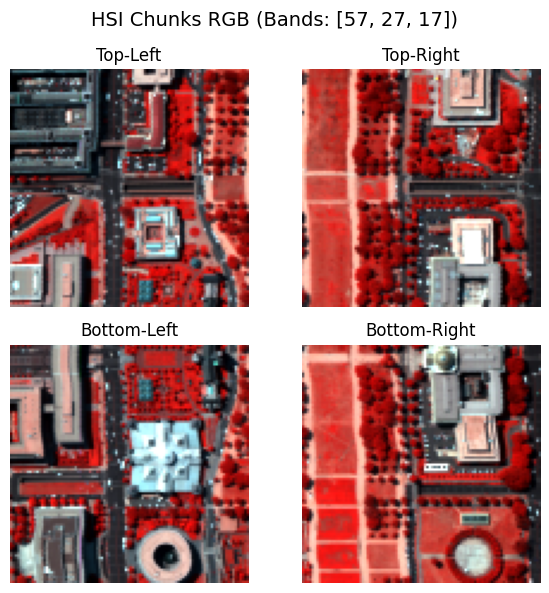

In [15]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

def load_hsi_mat(file_path):
    data = sio.loadmat(file_path)
    for key in data:
        if isinstance(data[key], np.ndarray) and data[key].ndim == 3:
            return data[key].astype(np.float32)
    raise ValueError("No valid 3D HSI array found.")

def split_hsi_into_4(hsi):
    H, W, C = hsi.shape
    h_mid, w_mid = H // 2, W // 2
    return {
        "Top-Left": hsi[0:h_mid, 0:w_mid, :],
        "Top-Right": hsi[0:h_mid, w_mid:, :],
        "Bottom-Left": hsi[h_mid:, 0:w_mid, :],
        "Bottom-Right": hsi[h_mid:, w_mid:, :]
    }

def normalize_rgb(hsi, bands):
    rgb = hsi[:, :, bands]
    rgb_min = rgb.min(axis=(0, 1), keepdims=True)
    rgb_max = rgb.max(axis=(0, 1), keepdims=True)
    return (rgb - rgb_min) / (rgb_max - rgb_min + 1e-8)

def visualize_chunks(chunks, bands=[57, 27, 17]):
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    axs = axs.ravel()

    for idx, (title, hsi_chunk) in enumerate(chunks.items()):
        rgb_img = normalize_rgb(hsi_chunk, bands)
        axs[idx].imshow(rgb_img)
        axs[idx].set_title(title)
        axs[idx].axis("off")

    plt.suptitle(f"HSI Chunks RGB (Bands: {bands})", fontsize=14)
    plt.tight_layout()
    plt.show()

# -----------------------
# Main
# -----------------------
if __name__ == "__main__":
    file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset/wdc_crop_test.mat" 
    hsi = load_hsi_mat(file_path)
    chunks = split_hsi_into_4(hsi)
    visualize_chunks(chunks)


In [16]:
# Code to manually split the test Washington-crop-test into 4 parts for training
import os
import numpy as np
import scipy.io as sio

def split_hsi_into_quadrants(hsi):
    """
    Split the HSI into 4 equal spatial chunks.
    Returns: list of 4 numpy arrays
    """
    H, W, C = hsi.shape
    h_half, w_half = H // 2, W // 2
    return [
        hsi[:h_half, :w_half, :],     # Top-left
        hsi[:h_half, w_half:, :],     # Top-right
        hsi[h_half:, :w_half, :],     # Bottom-left
        hsi[h_half:, w_half:, :]      # Bottom-right
    ]

def save_chunks_as_mat(chunks, save_dir, base_filename="chunk"):
    """
    Save each HSI chunk as a .mat file in the specified directory.
    """
    os.makedirs(save_dir, exist_ok=True)
    for idx, chunk in enumerate(chunks):
        save_path = os.path.join(save_dir, f"{base_filename}_{idx+1}.mat")
        sio.savemat(save_path, {"hsi": chunk})
        print(f"Saved: {save_path} | Shape: {chunk.shape}")

# ----------------------
# Load original HSI file
# ----------------------
mat_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset/wdc_crop_test.mat" 
save_directory = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc"  #  change this
base_filename = "train_Wash"

mat_contents = sio.loadmat(mat_file_path)

# Extract the 3D HSI array
hsi = None
for key in mat_contents:
    if isinstance(mat_contents[key], np.ndarray) and mat_contents[key].ndim == 3:
        hsi = mat_contents[key].astype(np.float32)
        break

if hsi is None:
    raise ValueError("No 3D array found in the .mat file.")

# ----------------------
# Split and Save
# ----------------------
chunks = split_hsi_into_quadrants(hsi)
save_chunks_as_mat(chunks, save_dir=save_directory, base_filename=base_filename)


Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_1.mat | Shape: (100, 100, 191)
Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_2.mat | Shape: (100, 100, 191)
Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_3.mat | Shape: (100, 100, 191)
Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_4.mat | Shape: (100, 100, 191)


Original HSI shape: (200, 57, 191)
Number of patches: 30
Patch size: 32x32
Source file: train_Wash3.mat
Visualization saved to: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash3_patch_visualization.png


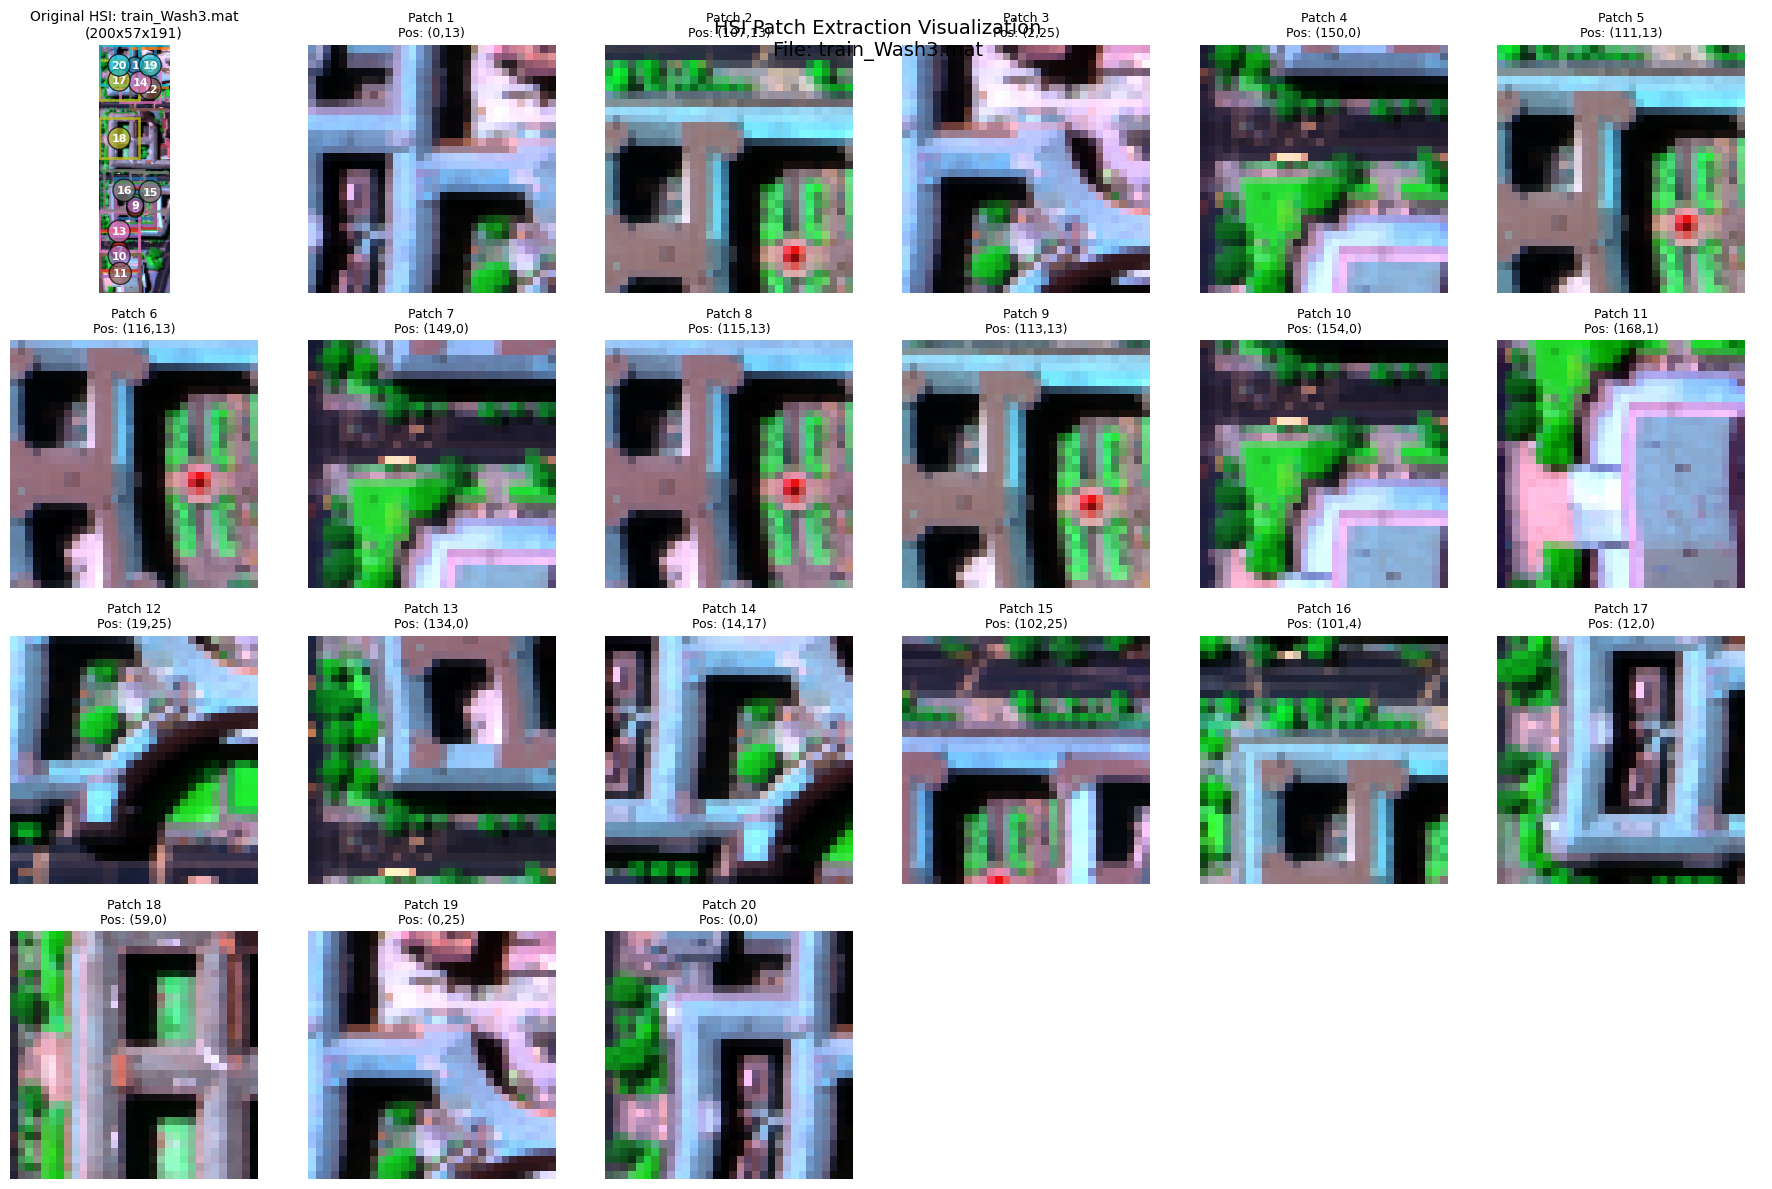

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.io as sio
import os
from pathlib import Path
import math

class HSIPatchVisualizer:
    def __init__(self, original_hsi_dir, patches_dir):
        self.original_hsi_dir = original_hsi_dir
        self.patches_dir = patches_dir
        
    def load_original_hsi(self, filename):
        """Load the original HSI .mat file"""
        file_path = os.path.join(self.original_hsi_dir, filename)
        data = sio.loadmat(file_path)
        
        # Find the HSI data (3D array)
        for key in data:
            if isinstance(data[key], np.ndarray) and data[key].ndim == 3:
                return data[key], key
        raise ValueError(f"No valid 3D HSI data found in {filename}")
    
    def load_patches(self, patch_filename):
        """Load patches from .mat file"""
        file_path = os.path.join(self.patches_dir, patch_filename)
        data = sio.loadmat(file_path)
        
        patches = data['patches']  # Shape: (num_patches, channels, height, width)
        coordinates = data['coordinates']  # Shape: (num_patches, 2)
        source_file = str(data['source_file'][0]) if isinstance(data['source_file'], np.ndarray) else data['source_file']
        
        return patches, coordinates, source_file
    
    def create_rgb_from_hsi(self, hsi_data, band_indices=None):
        """Convert HSI to RGB for visualization"""
        h, w, depth = hsi_data.shape
        
        if band_indices is None:
            # Use bands from different parts of the spectrum
            band_indices = [depth//4, depth//2, 3*depth//4]
        
        # Ensure band indices are within bounds
        band_indices = [max(0, min(b, depth-1)) for b in band_indices]
        
        rgb_image = hsi_data[:, :, band_indices]
        
        # Normalize to 0-1 range
        rgb_norm = (rgb_image - rgb_image.min(axis=(0,1))) / (np.ptp(rgb_image, axis=(0,1)) + 1e-6)
        
        return rgb_norm
    
    def create_rgb_from_patch(self, patch, band_indices=None):
        """Convert patch to RGB for visualization"""
        # patch shape: (channels, height, width)
        channels, height, width = patch.shape
        
        if band_indices is None:
            # Use bands from different parts of the spectrum
            band_indices = [channels//4, channels//2, 3*channels//4]
        
        # Ensure band indices are within bounds
        band_indices = [max(0, min(b, channels-1)) for b in band_indices]
        
        # Transpose to (height, width, channels) and select bands
        patch_hwc = patch.transpose(1, 2, 0)
        rgb_patch = patch_hwc[:, :, band_indices]
        
        # Normalize to 0-1 range
        rgb_norm = (rgb_patch - rgb_patch.min(axis=(0,1))) / (np.ptp(rgb_patch, axis=(0,1)) + 1e-6)
        
        return rgb_norm
    
    def visualize_patches_with_original(self, original_filename, patch_filename=None, band_indices=None, max_patches=20):
        """
        Visualize original HSI with patch locations and display individual patches
        
        Args:
            original_filename: Name of original .mat file
            patch_filename: Name of patch .mat file (if None, inferred from original_filename)
            band_indices: RGB band indices for visualization
            max_patches: Maximum number of patches to display
        """
        
        # Load original HSI
        hsi_data, _ = self.load_original_hsi(original_filename)
        
        # Infer patch filename if not provided
        if patch_filename is None:
            base_name = os.path.splitext(original_filename)[0]
            patch_filename = f"{base_name}_patches.mat"
        
        # Load patches
        patches, coordinates, source_file = self.load_patches(patch_filename)
        num_patches = patches.shape[0]
        patch_size = patches.shape[2]  # Assuming square patches
        
        print(f"Original HSI shape: {hsi_data.shape}")
        print(f"Number of patches: {num_patches}")
        print(f"Patch size: {patch_size}x{patch_size}")
        print(f"Source file: {source_file}")
        
        # Limit number of patches to display
        display_patches = min(num_patches, max_patches)
        
        # Create RGB representation of original HSI
        rgb_hsi = self.create_rgb_from_hsi(hsi_data, band_indices)
        
        # Calculate subplot grid
        # First subplot for original image, rest for patches
        total_subplots = display_patches + 1
        cols = min(6, total_subplots)  # Max 6 columns
        rows = math.ceil(total_subplots / cols)
        
        # Create figure with appropriate size
        fig_width = cols * 3
        fig_height = rows * 3
        fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
        
        # Handle case where we have only one row
        if rows == 1:
            axes = axes.reshape(1, -1) if total_subplots > 1 else [axes]
        
        # Flatten axes for easier indexing
        axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
        
        # Plot original HSI with patch locations
        axes_flat[0].imshow(rgb_hsi)
        axes_flat[0].set_title(f"Original HSI: {original_filename}\n({hsi_data.shape[0]}x{hsi_data.shape[1]}x{hsi_data.shape[2]})", fontsize=10)
        axes_flat[0].axis('off')
        
        # Add rectangles for patch locations
        colors = plt.cm.tab10(np.linspace(0, 1, display_patches))
        for i in range(display_patches):
            x, y = coordinates[i]
            rect = mpatches.Rectangle((y, x), patch_size, patch_size, 
                                    linewidth=2, edgecolor=colors[i], 
                                    facecolor='none', alpha=0.8)
            axes_flat[0].add_patch(rect)
            
            # Add patch number
            axes_flat[0].text(y + patch_size/2, x + patch_size/2, str(i+1), 
                            ha='center', va='center', color='white', 
                            fontweight='bold', fontsize=8,
                            bbox=dict(boxstyle='circle', facecolor=colors[i], alpha=0.7))
        
        # Plot individual patches
        for i in range(display_patches):
            ax_idx = i + 1
            patch = patches[i]
            x, y = coordinates[i]
            
            # Create RGB representation of patch
            rgb_patch = self.create_rgb_from_patch(patch, band_indices)
            
            axes_flat[ax_idx].imshow(rgb_patch)
            axes_flat[ax_idx].set_title(f"Patch {i+1}\nPos: ({x},{y})", fontsize=9)
            axes_flat[ax_idx].axis('off')
            
            # Add colored border matching the rectangle in main image
            for spine in axes_flat[ax_idx].spines.values():
                spine.set_edgecolor(colors[i])
                spine.set_linewidth(3)
        
        # Hide unused subplots
        for i in range(total_subplots, len(axes_flat)):
            axes_flat[i].axis('off')
        
        plt.tight_layout()
        plt.suptitle(f"HSI Patch Extraction Visualization\nFile: {original_filename}", 
                    fontsize=14, y=0.98)
        
        # Save the plot
        save_path = os.path.join(self.patches_dir, f"{os.path.splitext(original_filename)[0]}_patch_visualization.png")
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"Visualization saved to: {save_path}")
        
        plt.show()
    
    def compare_multiple_files(self, max_files=3, max_patches_per_file=6):
        """Compare patches from multiple HSI files"""
        patch_files = [f for f in os.listdir(self.patches_dir) if f.endswith('_patches.mat')]
        
        files_to_compare = patch_files[:max_files]
        
        fig, axes = plt.subplots(max_files, max_patches_per_file + 1, 
                               figsize=(15, 5 * max_files))
        
        if max_files == 1:
            axes = axes.reshape(1, -1)
        
        for file_idx, patch_file in enumerate(files_to_compare):
            # Load patches
            patches, coordinates, source_file = self.load_patches(patch_file)
            
            # Load original HSI
            hsi_data, _ = self.load_original_hsi(source_file)
            rgb_hsi = self.create_rgb_from_hsi(hsi_data)
            
            # Plot original
            axes[file_idx, 0].imshow(rgb_hsi)
            axes[file_idx, 0].set_title(f"Original: {source_file}", fontsize=10)
            axes[file_idx, 0].axis('off')
            
            # Plot patches
            num_patches_to_show = min(max_patches_per_file, patches.shape[0])
            for patch_idx in range(num_patches_to_show):
                patch = patches[patch_idx]
                rgb_patch = self.create_rgb_from_patch(patch)
                
                axes[file_idx, patch_idx + 1].imshow(rgb_patch)
                axes[file_idx, patch_idx + 1].set_title(f"P{patch_idx+1}", fontsize=9)
                axes[file_idx, patch_idx + 1].axis('off')
            
            # Hide unused patch slots
            for i in range(num_patches_to_show + 1, max_patches_per_file + 1):
                axes[file_idx, i].axis('off')
        
        plt.tight_layout()
        plt.suptitle("Multi-File HSI Patch Comparison", fontsize=16, y=0.98)
        plt.show()

# Example usage function
def visualize_hsi_patches(original_hsi_dir, patches_dir, filename=None):
    """
    Standalone function to visualize HSI patches
    
    Args:
        original_hsi_dir: Directory containing original .mat HSI files
        patches_dir: Directory containing saved patch .mat files
        filename: Specific file to visualize (if None, uses first available)
    """
    visualizer = HSIPatchVisualizer(original_hsi_dir, patches_dir)
    
    if filename is None:
        # Find first available patch file
        patch_files = [f for f in os.listdir(patches_dir) if f.endswith('_patches.mat')]
        if not patch_files:
            print("No patch files found!")
            return
        patch_file = patch_files[0]
        
        # Extract original filename
        base_name = patch_file.replace('_patches.mat', '')
        original_filename = f"{base_name}.mat"
    else:
        original_filename = filename
    
    # Visualize the patches
    visualizer.visualize_patches_with_original(original_filename, max_patches=20)

# Main execution
if __name__ == "__main__":
    # Set your paths here
    original_hsi_dir = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset"
    patches_dir = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches"
    
    # Visualize patches for a specific file (or first available if None)
    visualize_hsi_patches(original_hsi_dir, patches_dir, filename=None)
    
    # Optional: Compare multiple files
    # visualizer = HSIPatchVisualizer(original_hsi_dir, patches_dir)
    # visualizer.compare_multiple_files(max_files=2, max_patches_per_file=6)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import psutil
import time
from tqdm import tqdm

class SpectralSpatialConv3D(nn.Module):
    """
    3D CNN with dual-branch architecture for hyperspectral image feature extraction.
    Uses ReLU and GELU activation functions in parallel branches.
    """
    def __init__(self, in_channels=1, out_channels=64, dropout=0.2):
        super(SpectralSpatialConv3D, self).__init__()

        # Branch 1 with ReLU activation
        self.branch1_conv1 = nn.Conv3d(in_channels, 32, kernel_size=3, padding=1)
        self.branch1_bn1 = nn.BatchNorm3d(32)
        self.branch1_conv2 = nn.Conv3d(32, out_channels, kernel_size=3, padding=1)
        self.branch1_bn2 = nn.BatchNorm3d(out_channels)

        # Branch 2 with GELU activation
        self.branch2_conv1 = nn.Conv3d(in_channels, 32, kernel_size=3, padding=1)
        self.branch2_bn1 = nn.BatchNorm3d(32)
        self.branch2_conv2 = nn.Conv3d(32, out_channels, kernel_size=3, padding=1)
        self.branch2_bn2 = nn.BatchNorm3d(out_channels)
        
        self.dropout = nn.Dropout3d(p=dropout)
    
    def forward(self, x):
        # Branch 1 with ReLU
        x1 = F.relu(self.branch1_bn1(self.branch1_conv1(x)))
        x1 = F.relu(self.branch1_bn2(self.branch1_conv2(x1)))
        
        # Branch 2 with GELU
        x2 = F.gelu(self.branch2_bn1(self.branch2_conv1(x)))
        x2 = F.gelu(self.branch2_bn2(self.branch2_conv2(x2)))

        # Fuse branches and apply dropout
        x_fused = x1 + x2
        x_fused = self.dropout(x_fused)
        return x_fused

def get_memory_usage():
    """Get current RAM usage in GB"""
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    return memory_info.rss / (1024 ** 3)  # Convert to GB

# The extract_and_process_patches_conv3d function takes a .mat file containing pre-extracted patches,
# loads them directly, and processes them through an UNTRAINED Conv3D model to extract features.
# This follows the original approach of using randomly initialized weights for feature extraction.
def extract_and_process_patches_conv3d(mat_file_path, use_gpu=True, batch_size=32, patch_key='patches'):
    """
    Load pre-extracted patches from a .mat file and process them through an untrained Conv3D model.
    This replicates the original behavior of feature extraction without training.
    
    Args:
        mat_file_path (str): Path to the .mat file containing patches
        use_gpu (bool): Whether to use GPU for processing
        batch_size (int): Batch size for processing
        patch_key (str): Key name in the .mat file that contains the patches
    
    Returns:
        tuple: (input_patches, output_features, model)
    """
    
    # Load patches from .mat file
    try:
        mat_data = sio.loadmat(mat_file_path)
        print(f"Loading patches from: {mat_file_path}")
        
        # Try to find patches in the .mat file
        if patch_key in mat_data:
            patches = mat_data[patch_key]
        else:
            # If patch_key not found, try common alternative names
            possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
            found_key = None
            for key in possible_keys:
                if key in mat_data and not key.startswith('__'):
                    found_key = key
                    break
            
            if found_key:
                patches = mat_data[found_key]
                print(f"Found patches under key: '{found_key}'")
            else:
                available_keys = [k for k in mat_data.keys() if not k.startswith('__')]
                raise KeyError(f"Patch key '{patch_key}' not found. Available keys: {available_keys}")
        
        print(f"Loaded patches shape: {patches.shape}")
        
    except Exception as e:
        print(f"Error loading {mat_file_path}: {e}")
        return None, None, None
    
    # Convert to PyTorch tensor
    # Assuming patches are in format: (num_patches, height, width, spectral_bands)
    if len(patches.shape) == 4:
        # Convert numpy array to tensor and add channel dimension
        patch_tensor = torch.from_numpy(patches).float().unsqueeze(1)
    else:
        raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")

    if len(patch_tensor) == 0:
        print("No patches found in the file.")
        return None, None, None

    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else 
                          "mps" if use_gpu and torch.cuda.is_available() else 
                          "cpu")
    print(f"Using device: {device}")
    
    # Initialize the model with random weights (UNTRAINED)
    model = SpectralSpatialConv3D(in_channels=1, out_channels=64).to(device)
    # Set the model to evaluation mode (no training, no gradient computation)
    model.eval()

    # Process patches through the UNTRAINED model
    outputs = []
    with torch.no_grad():
        # Loop through the patch_tensor in chunks of batches
        for i in range(0, patch_tensor.shape[0], batch_size):
            # Extract a subset of patches
            batch = patch_tensor[i:i+batch_size].to(device)
            # Pass the batch through the UNTRAINED model to get feature maps
            batch_output = model(batch)
            # Move the output back to CPU and store it in outputs
            outputs.append(batch_output.cpu())
    
    # Combine all batch outputs into a single tensor
    output_tensor = torch.cat(outputs, dim=0)
    return patch_tensor, output_tensor, model

def save_feature_maps(input_tensor, output_tensor, save_dir="/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/conv_3d"):
    """
    Save feature maps as .mat files and numpy arrays.
    
    Args:
        input_tensor: Original input patches tensor
        output_tensor: Extracted feature maps tensor
        save_dir: Directory to save the feature maps
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # Convert tensors to numpy arrays
    input_numpy = input_tensor.cpu().numpy()
    output_numpy = output_tensor.cpu().numpy()
    
    print(f"\nSaving feature maps to: {save_dir}")
    print(f"Input patches shape: {input_numpy.shape}")
    print(f"Feature maps shape: {output_numpy.shape}")
    
    # Save as .mat files (MATLAB format)
    input_mat_path = os.path.join(save_dir, "input_patches.mat")
    output_mat_path = os.path.join(save_dir, "feature_maps.mat")
    
    sio.savemat(input_mat_path, {
        'input_patches': input_numpy,
        'shape_info': {
            'num_patches': input_numpy.shape[0],
            'channels': input_numpy.shape[1],
            'height': input_numpy.shape[2],
            'width': input_numpy.shape[3],
            'spectral_bands': input_numpy.shape[4] if len(input_numpy.shape) > 4 else 1
        }
    })
    
    sio.savemat(output_mat_path, {
        'feature_maps': output_numpy,
        'shape_info': {
            'num_patches': output_numpy.shape[0],
            'feature_channels': output_numpy.shape[1],
            'height': output_numpy.shape[2],
            'width': output_numpy.shape[3],
            'spectral_bands': output_numpy.shape[4] if len(output_numpy.shape) > 4 else 1
        }
    })
    
    print(f" Input patches saved as: {input_mat_path}")
    print(f" Feature maps saved as: {output_mat_path}")
    
    # Also save as numpy arrays (.npy format)
    input_npy_path = os.path.join(save_dir, "input_patches.npy")
    output_npy_path = os.path.join(save_dir, "feature_maps.npy")
    
    np.save(input_npy_path, input_numpy)
    np.save(output_npy_path, output_numpy)
    
    print(f" Input patches saved as: {input_npy_path}")
    print(f" Feature maps saved as: {output_npy_path}")
    
    # Save metadata as text file
    metadata_path = os.path.join(save_dir, "feature_extraction_info.txt")
    with open(metadata_path, 'w') as f:
        f.write("HSI Conv3D Feature Extraction Results\n")
        f.write("="*50 + "\n")
        f.write(f"Extraction Date: {time.strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Model Type: Untrained SpectralSpatialConv3D (Random Weights)\n")
        f.write(f"Architecture: Dual-branch (ReLU + GELU)\n\n")
        f.write("Data Shapes:\n")
        f.write(f"  Input Patches: {input_numpy.shape}\n")
        f.write(f"  Feature Maps: {output_numpy.shape}\n\n")
        f.write("File Descriptions:\n")
        f.write("  input_patches.mat/.npy: Original HSI patches\n")
        f.write("  feature_maps.mat/.npy: Extracted feature maps (64 channels)\n")
        f.write("  Visualization: patch visualization images\n")
    
    print(f" Metadata saved as: {metadata_path}")
    
    return input_mat_path, output_mat_path, input_npy_path, output_npy_path

def main():
    """
    Main function that replicates the original behavior:
    Load patches from .mat file and process through UNTRAINED Conv3D model for feature extraction.
    """
    
    # Configuration - matches original approach
    mat_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches"
    save_dir = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/conv_3d"
    batch_size = 32
    use_gpu = True
    
    print("=" * 60)
    print("HSI Conv3D Feature Extraction")
    print("Using UNTRAINED model with random weights")
    print("=" * 60)
    
    # Monitor initial memory usage
    initial_memory = get_memory_usage()
    print(f"Initial RAM usage: {initial_memory:.2f} GB")
    
    # Load and process patches through untrained model
    print("\nLoading patches and processing through untrained Conv3D model...")
    patch_tensor, output_tensor, model = extract_and_process_patches_conv3d(
        mat_file_path, 
        use_gpu=use_gpu, 
        batch_size=batch_size,
        patch_key='patches'
    )

    if patch_tensor is not None and output_tensor is not None:
        final_memory = get_memory_usage()
        print(f"\nProcessing completed successfully!")
        print(f"Input shape: {patch_tensor.shape}")
        print(f"Output shape: {output_tensor.shape}")
        print(f"Final RAM usage: {final_memory:.2f} GB")
        print(f"Memory used: {final_memory - initial_memory:.2f} GB")
        
        # Save feature maps
        print("\nSaving feature maps...")
        input_mat, output_mat, input_npy, output_npy = save_feature_maps(
            patch_tensor, output_tensor, save_dir
        )
        
        # Visualize results
        print("\nGenerating visualization...")
        visualize_feature_maps(patch_tensor, output_tensor, index=0, file="untrained_sample", x=0, y=0)
        
        print("\n" + "=" * 60)
        print("Feature extraction completed!")
        print("Note: Features extracted using UNTRAINED model (random weights)")
        print(f"All results saved in: {save_dir}")
        print("=" * 60)
    else:
        print("Patch processing failed.")

if __name__ == "__main__":
    main()

HSI Conv3D Feature Extraction (Original Approach)
Using UNTRAINED model with random weights
Initial RAM usage: 0.14 GB

Loading patches and processing through untrained Conv3D model...
Loading patches from: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches
Loaded patches shape: (30, 191, 32, 32)
Using device: cpu


Loading patches...
Loaded 30 patches from train_Wash2.mat
Patch shape: torch.Size([191, 32, 32]) (channels, height, width)
Coordinate range: X(0-168), Y(0-18)

Initializing transformer model...
Model initialized with 3733504 parameters

Processing patches through transformer...

Rejoining processed patches...
Rejoining 30 patches of size 32x32
Estimated original size: 50x200
Rejoined HSI shape before transpose: torch.Size([191, 50, 200])
Rejoined HSI shape after transpose: torch.Size([200, 50, 191])

Loading original HSI...
Loaded original HSI with key 'tr_data', shape: (200, 50, 191)

Comparing original and rejoined HSI...
Original HSI shape: (200, 50, 191)
Rejoined HSI shape: (200, 50, 191)


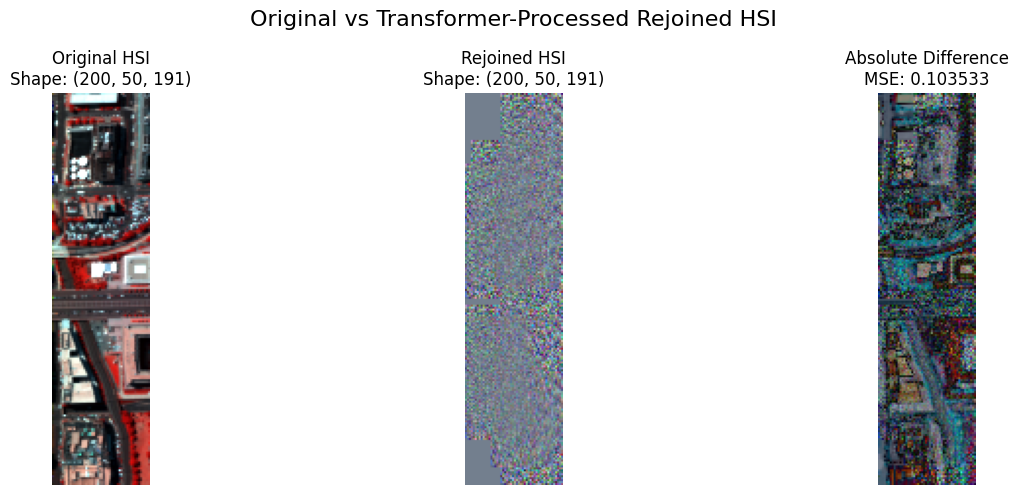


Comparison Statistics:
MSE: 0.103533
PSNR: 9.85 dB
Max absolute difference: 0.960502


In [9]:
#### testing Transformer to merge patches after denoising::

############################################ HSI TRANSFORMER MODEL WITH PATCH PROCESSING ##################################################

import os
import numpy as np
import scipy.io as sio
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math

# ========================================
# 1. TRANSFORMER MODEL CLASSES
# ========================================

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
        self.dropout = nn.Dropout(dropout)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        attn_probs = self.dropout(attn_probs)
        output = torch.matmul(attn_probs, V)
        return output
        
    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        
        Q = self.W_q(query).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(key).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(value).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.W_o(attn_output)
        return output

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        return self.fc2(self.dropout(F.relu(self.fc1(x))))

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length=5000):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.ffn = PositionwiseFeedForward(d_model, d_ff, dropout)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        attn_output = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ffn_output = self.ffn(x)
        x = self.norm2(x + self.dropout(ffn_output))
        return x

class HSITransformer(nn.Module):
    def __init__(self, patch_size=64, num_channels=191, d_model=512, num_heads=8, 
                 num_layers=6, d_ff=2048, dropout=0.1):
        super(HSITransformer, self).__init__()
        
        self.patch_size = patch_size
        self.num_channels = num_channels
        self.d_model = d_model
        
        # Patch embedding: Convert patch pixels to d_model dimension
        self.patch_embed = nn.Linear(patch_size * patch_size, d_model)
        
        # Channel embedding: Each spectral channel gets its own embedding
        self.channel_embed = nn.Embedding(num_channels, d_model)
        
        # Positional encoding
        self.pos_encoding = PositionalEncoding(d_model)
        
        # Transformer blocks
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        # Output projection back to patch space
        self.output_proj = nn.Linear(d_model, patch_size * patch_size)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        """
        Args:
            x: Input patches of shape (batch_size, num_channels, patch_size, patch_size)
        Returns:
            Reconstructed patches of same shape
        """
        batch_size, num_channels, patch_h, patch_w = x.shape
        
        # Flatten spatial dimensions: (batch_size, num_channels, patch_size^2)
        # Fix: Use .reshape() instead of .view() to handle non-contiguous tensors
        x_flat = x.reshape(batch_size, num_channels, patch_h * patch_w)
        
        # Embed patches: (batch_size, num_channels, d_model)
        patch_embeddings = self.patch_embed(x_flat)
        
        # Add channel embeddings
        channel_ids = torch.arange(num_channels, device=x.device).unsqueeze(0).expand(batch_size, -1)
        channel_embeddings = self.channel_embed(channel_ids)
        
        # Combine embeddings
        embeddings = patch_embeddings + channel_embeddings
        
        # Add positional encoding
        embeddings = self.pos_encoding(embeddings)
        embeddings = self.dropout(embeddings)
        
        # Pass through transformer blocks
        for transformer_block in self.transformer_blocks:
            embeddings = transformer_block(embeddings)
        
        # Project back to patch space
        output = self.output_proj(embeddings)  # (batch_size, num_channels, patch_size^2)
        
        # Reshape back to patch format - use .reshape() here too
        output = output.reshape(batch_size, num_channels, patch_h, patch_w)
        
        return output

# ========================================
# 2. HSI DATA PROCESSING CLASSES
# ========================================

class HSIDataLoader:
    @staticmethod
    def load_hsi_from_mat(file_path):
        """
        Loads 3D HSI data from a .mat file.
        Returns:
            - np.ndarray of shape (H, W, C)
            - string key used in .mat file
        """
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
            
        data = sio.loadmat(file_path)
        for key in data:
            if isinstance(data[key], np.ndarray) and data[key].ndim == 3:
                return data[key], key
        raise ValueError(f"No valid 3D HSI data found in {file_path}")

    @staticmethod
    def load_patches_from_mat(patch_file_path):
        """
        Load patches from a saved .mat file
        Returns:
            patches: torch tensor of shape (num_patches, channels, height, width)
            coordinates: array of (x, y) coordinates
            source_file: source file name
        """
        if not os.path.exists(patch_file_path):
            raise FileNotFoundError(f"Patch file not found: {patch_file_path}")
            
        data = sio.loadmat(patch_file_path)
        
        patches = torch.tensor(data['patches']).float()
        coordinates = data['coordinates']
        source_file = str(data['source_file'][0]) if isinstance(data['source_file'], np.ndarray) else data['source_file']
        
        return patches, coordinates, source_file

class HSIPatchProcessor:
    def __init__(self, patch_size=64, overlap=0):
        """
        Initialize the patch processor.
        Args:
            patch_size: Size of each patch (assuming square patches)
            overlap: Overlap between patches (if any)
        """
        self.patch_size = patch_size
        self.overlap = overlap
        self.stride = patch_size - overlap

    def determine_original_size(self, coordinates, patch_size):
        """
        Determine the original HSI dimensions from patch coordinates.
        Args:
            coordinates: Array of (x, y) coordinates
            patch_size: Size of patches
        Returns:
            (height, width) of original HSI
        """
        max_x = np.max(coordinates[:, 0]) + patch_size
        max_y = np.max(coordinates[:, 1]) + patch_size
        return max_y, max_x

    def rejoin_patches(self, patches, coordinates):
        """
        Rejoin patches to form the original HSI.
        Args:
            patches: torch tensor of shape (num_patches, channels, height, width)
            coordinates: array of (x, y) coordinates for each patch
        Returns:
            torch tensor of rejoined HSI of shape (channels, height, width)
        """
        num_patches, channels, patch_h, patch_w = patches.shape
        
        # Determine original dimensions
        orig_h, orig_w = self.determine_original_size(coordinates, patch_h)
        
        print(f"Rejoining {num_patches} patches of size {patch_h}x{patch_w}")
        print(f"Estimated original size: {orig_h}x{orig_w}")
        
        # Initialize the rejoined HSI and overlap counter
        rejoined_hsi = torch.zeros(channels, orig_h, orig_w)
        overlap_counter = torch.zeros(orig_h, orig_w)
        
        # Place each patch in the rejoined HSI
        for i in range(num_patches):
            x, y = coordinates[i]
            x, y = int(x), int(y)
            
            patch = patches[i]  # Shape: (channels, patch_h, patch_w)
            
            # Check bounds
            end_y = min(y + patch_h, orig_h)
            end_x = min(x + patch_w, orig_w)
            patch_h_actual = end_y - y
            patch_w_actual = end_x - x
            
            # Add patch to rejoined HSI
            rejoined_hsi[:, y:end_y, x:end_x] += patch[:, :patch_h_actual, :patch_w_actual]
            overlap_counter[y:end_y, x:end_x] += 1
        
        # Handle overlapping regions by averaging
        overlap_counter[overlap_counter == 0] = 1  # Avoid division by zero
        rejoined_hsi = rejoined_hsi / overlap_counter.unsqueeze(0)
        
        return rejoined_hsi

    def process_patches_with_transformer(self, patches, model):
        """
        Process patches through transformer model.
        Args:
            patches: torch tensor of shape (num_patches, channels, height, width)
            model: HSITransformer model
        Returns:
            processed patches of same shape
        """
        model.eval()
        processed_patches = []
        
        with torch.no_grad():
            for i in range(patches.shape[0]):
                # Process single patch
                patch = patches[i:i+1]  # Keep batch dimension
                processed_patch = model(patch)
                processed_patches.append(processed_patch)
        
        return torch.cat(processed_patches, dim=0)

# ========================================
# 3. VISUALIZATION CLASS
# ========================================

class HSIVisualizer:
    @staticmethod
    def normalize_rgb(hsi, bands):
        """Normalize selected bands for RGB visualization."""
        rgb = hsi[:, :, bands]
        rgb_min = rgb.min(axis=(0, 1), keepdims=True)
        rgb_range = rgb.max(axis=(0, 1), keepdims=True) - rgb_min + 1e-8
        rgb_normalized = (rgb - rgb_min) / rgb_range
        return rgb_normalized

    @staticmethod
    def to_numpy(hsi):
        """Convert tensor to numpy and ensure (H, W, C) format."""
        if isinstance(hsi, torch.Tensor):
            hsi = hsi.detach().cpu().numpy()
        if hsi.ndim == 3 and hsi.shape[0] < hsi.shape[-1]:
            hsi = np.transpose(hsi, (1, 2, 0))  # (C,H,W) -> (H,W,C)
        return hsi

    @classmethod
    def visualize_hsi_comparison(cls, original_hsi, rejoined_hsi, bands=[57, 27, 17], 
                                title="HSI Comparison"):
        """
        Compare original HSI with rejoined HSI from patches.
        Args:
            original_hsi: torch tensor or numpy array of original HSI
            rejoined_hsi: torch tensor of rejoined HSI
            bands: RGB band indices for visualization
            title: Plot title
        """
        # Convert to numpy and ensure (H, W, C) format
        original_np = cls.to_numpy(original_hsi)
        rejoined_np = cls.to_numpy(rejoined_hsi)
        
        print(f"Original HSI shape: {original_np.shape}")
        print(f"Rejoined HSI shape: {rejoined_np.shape}")
        
        # Create RGB representations
        original_rgb = cls.normalize_rgb(original_np, bands)
        rejoined_rgb = cls.normalize_rgb(rejoined_np, bands)
        
        # Calculate difference
        min_h = min(original_rgb.shape[0], rejoined_rgb.shape[0])
        min_w = min(original_rgb.shape[1], rejoined_rgb.shape[1])
        
        original_crop = original_rgb[:min_h, :min_w, :]
        rejoined_crop = rejoined_rgb[:min_h, :min_w, :]
        
        difference = np.abs(original_crop - rejoined_crop)
        
        # Create comparison plot
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(original_crop)
        axes[0].set_title(f"Original HSI\nShape: {original_np.shape}")
        axes[0].axis('off')
        
        axes[1].imshow(rejoined_crop)
        axes[1].set_title(f"Rejoined HSI\nShape: {rejoined_np.shape}")
        axes[1].axis('off')
        
        axes[2].imshow(difference)
        axes[2].set_title(f"Absolute Difference\nMSE: {np.mean(difference**2):.6f}")
        axes[2].axis('off')
        
        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Calculate and print statistics
        mse = np.mean((original_crop - rejoined_crop) ** 2)
        psnr = 20 * np.log10(1.0 / np.sqrt(mse)) if mse > 0 else float('inf')
        
        print(f"\nComparison Statistics:")
        print(f"MSE: {mse:.6f}")
        print(f"PSNR: {psnr:.2f} dB")
        print(f"Max absolute difference: {np.max(difference):.6f}")

# ========================================
# 4. MAIN EXECUTION
# ========================================

# ========================================
# 4. MAIN EXECUTION
# ========================================

if __name__ == "__main__":
    # File paths
    patch_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat"
    # patch_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches.mat"
    original_hsi_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset/train_Wash2.mat"
    
    # Initialize components
    data_loader = HSIDataLoader()
    patch_processor = HSIPatchProcessor(patch_size=64)
    visualizer = HSIVisualizer()
    
    print("Loading patches...")
    # Load patches
    patches, coordinates, source_file = data_loader.load_patches_from_mat(patch_file_path)
    print(f"Loaded {patches.shape[0]} patches from {source_file}")
    print(f"Patch shape: {patches.shape[1:]} (channels, height, width)")
    print(f"Coordinate range: X({coordinates[:, 0].min()}-{coordinates[:, 0].max()}), Y({coordinates[:, 1].min()}-{coordinates[:, 1].max()})")
    
    # Initialize transformer model
    print("\nInitializing transformer model...")
    num_channels = patches.shape[1]
    patch_size = patches.shape[2]
    model = HSITransformer(
        patch_size=patch_size, 
        num_channels=num_channels,
        d_model=256,  # Reduced for faster processing
        num_heads=8,
        num_layers=4,  # Reduced for faster processing
        d_ff=1024,
        dropout=0.1
    )
    
    print(f"Model initialized with {sum(p.numel() for p in model.parameters())} parameters")
    
    # Process patches through transformer (identity operation for now)
    print("\nProcessing patches through transformer...")
    processed_patches = patch_processor.process_patches_with_transformer(patches, model)
    
    print("\nRejoining processed patches...")
    # Rejoin processed patches
    rejoined_hsi = patch_processor.rejoin_patches(processed_patches, coordinates)
    print(f"Rejoined HSI shape before transpose: {rejoined_hsi.shape}")
    
    # TRANSPOSE FIX: Convert from (C, H, W) to (H, W, C) format
    rejoined_hsi = rejoined_hsi.permute(2, 1, 0)
    print(f"Rejoined HSI shape after transpose: {rejoined_hsi.shape}")
    
    print("\nLoading original HSI...")
    # Load original HSI
    original_hsi_data, key = data_loader.load_hsi_from_mat(original_hsi_path)
    print(f"Loaded original HSI with key '{key}', shape: {original_hsi_data.shape}")
    
    # Convert original HSI to tensor format (keep H, W, C format)
    original_hsi_tensor = torch.tensor(original_hsi_data).float()
    
    print("\nComparing original and rejoined HSI...")
    # Visualize comparison
    visualizer.visualize_hsi_comparison(
        original_hsi_tensor, 
        rejoined_hsi, 
        bands=[57, 27, 17], 
        title="Original vs Transformer-Processed Rejoined HSI"
    )